In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from bs4 import BeautifulSoup
import pickle as pkl

In [25]:
with open("data/data_splits.pkl", "rb") as f:
    data = pkl.load(f)

df_train = data["train"]
df_test = data["test"]
df_deficient = data["deficient"]

In [26]:
file_path = 'data/assessments.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Display basic information about the data
print("Data Summary:")
print(df.info())

# Display the first few rows of the table
print("\nPreview of Data:")
print(df.head())

# Optional: Handle missing values
# df = df.dropna()  # or use df.fillna(value) to fill missing values

# Optional: Convert column types if needed
# Example: Convert a column to datetime
# df['date_column'] = pd.to_datetime(df['date_column'])

# Now 'df' is a clean, tabular DataFrame ready for processing


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52566 entries, 0 to 52565
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   assessmentId              52566 non-null  int64  
 1   internalTaxonId           52566 non-null  int64  
 2   scientificName            52566 non-null  object 
 3   redlistCategory           52566 non-null  object 
 4   redlistCriteria           11830 non-null  object 
 5   yearPublished             52566 non-null  int64  
 6   assessmentDate            52566 non-null  object 
 7   criteriaVersion           52566 non-null  float64
 8   language                  52566 non-null  object 
 9   rationale                 52453 non-null  object 
 10  habitat                   52491 non-null  object 
 11  threats                   52435 non-null  object 
 12  population                52428 non-null  object 
 13  populationTrend           52135 non-null  objec

drop non English entries

In [27]:
df['language'].value_counts()

language
English               50643
Portuguese             1895
Spanish; Castilian       28
Name: count, dtype: int64

In [28]:
df = df[df['language'] == 'English']

Keep only useful columns

In [29]:
use_columns = [
    'assessmentId', 'scientificName', 'internalTaxonId', 'redlistCategory',
    'rationale', 'habitat', 'threats', 'population', 'range', 'useTrade',
    'conservationActions', 'populationTrend', 'realm', 'systems',
    'possiblyExtinct', 'possiblyExtinctInTheWild'
]

df = df[use_columns]

In [30]:
df_dd = df[df['redlistCategory']=='Data Deficient']

In [31]:
len(df_dd)

8181

In [32]:
len(df_dd[df_dd['populationTrend']=='Unknown'])

7771

In [33]:
# Define a function to count NA/None/empty cells in a row
# Define a function to calculate the fraction of missing values for a column
def calculate_missing_fraction(column, condition):
    return df[df['redlistCategory'] == condition][column].isna().mean()

# Create a dictionary to store the results
missing_fractions = {}

# Iterate over each column and calculate the missing fraction for DD and non-DD species
for column in df.columns:
    if column != 'redlistCategory':  # Skip the 'redlistCategory' column itself
        missing_fractions[column] = {
            'Data Deficient': calculate_missing_fraction(column, 'Data Deficient') + 
                              df[df['redlistCategory'] == 'Data Deficient'][column].astype(str).str.contains(
                                  r'\b(nothing|no information|no data|not known)\b', case=False, na=False).mean(),
            'Not Data Deficient': calculate_missing_fraction(column, 'Data Deficient') if column == 'na_count' else 
                                  df[df['redlistCategory'] != 'Data Deficient'][column].astype(str).str.contains(
                                  r'\b(nothing|no information|no data|not known)\b', case=False, na=False).mean()
        }

# Print the results
for column, fractions in missing_fractions.items():
    print(f"{column}:")
    print(f"  Data Deficient: {fractions['Data Deficient']:.4f}")
    print(f"  Not Data Deficient: {fractions['Not Data Deficient']:.4f}")

/tmp/ipykernel_3975209/243045103.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['redlistCategory'] == 'Data Deficient'][column].astype(str).str.contains(
/tmp/ipykernel_3975209/243045103.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['redlistCategory'] != 'Data Deficient'][column].astype(str).str.contains(
/tmp/ipykernel_3975209/243045103.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['redlistCategory'] == 'Data Deficient'][column].astype(str).str.contains(
/tmp/ipykernel_3975209/243045103.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['redlistCategory'] != 'Data Deficient'][column].astype

assessmentId:
  Data Deficient: 0.0000
  Not Data Deficient: 0.0000
scientificName:
  Data Deficient: 0.0000
  Not Data Deficient: 0.0000
internalTaxonId:
  Data Deficient: 0.0000
  Not Data Deficient: 0.0000
rationale:
  Data Deficient: 0.1845
  Not Data Deficient: 0.0292
habitat:
  Data Deficient: 0.1264
  Not Data Deficient: 0.0424
threats:
  Data Deficient: 0.2333
  Not Data Deficient: 0.0449
population:
  Data Deficient: 0.3007
  Not Data Deficient: 0.1430
range:
  Data Deficient: 0.0218
  Not Data Deficient: 0.0114
useTrade:
  Data Deficient: 0.3005
  Not Data Deficient: 0.0583
conservationActions:
  Data Deficient: 0.1363
  Not Data Deficient: 0.0666
populationTrend:
  Data Deficient: 0.0040
  Not Data Deficient: 0.0000
realm:
  Data Deficient: 0.2679
  Not Data Deficient: 0.0000
systems:
  Data Deficient: 0.0000
  Not Data Deficient: 0.0000
possiblyExtinct:
  Data Deficient: 0.0000
  Not Data Deficient: 0.0000
possiblyExtinctInTheWild:
  Data Deficient: 0.0000
  Not Data Defici

/tmp/ipykernel_3975209/243045103.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['redlistCategory'] == 'Data Deficient'][column].astype(str).str.contains(
/tmp/ipykernel_3975209/243045103.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['redlistCategory'] != 'Data Deficient'][column].astype(str).str.contains(
/tmp/ipykernel_3975209/243045103.py:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['redlistCategory'] == 'Data Deficient'][column].astype(str).str.contains(
/tmp/ipykernel_3975209/243045103.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['redlistCategory'] != 'Data Deficient'][column].astype

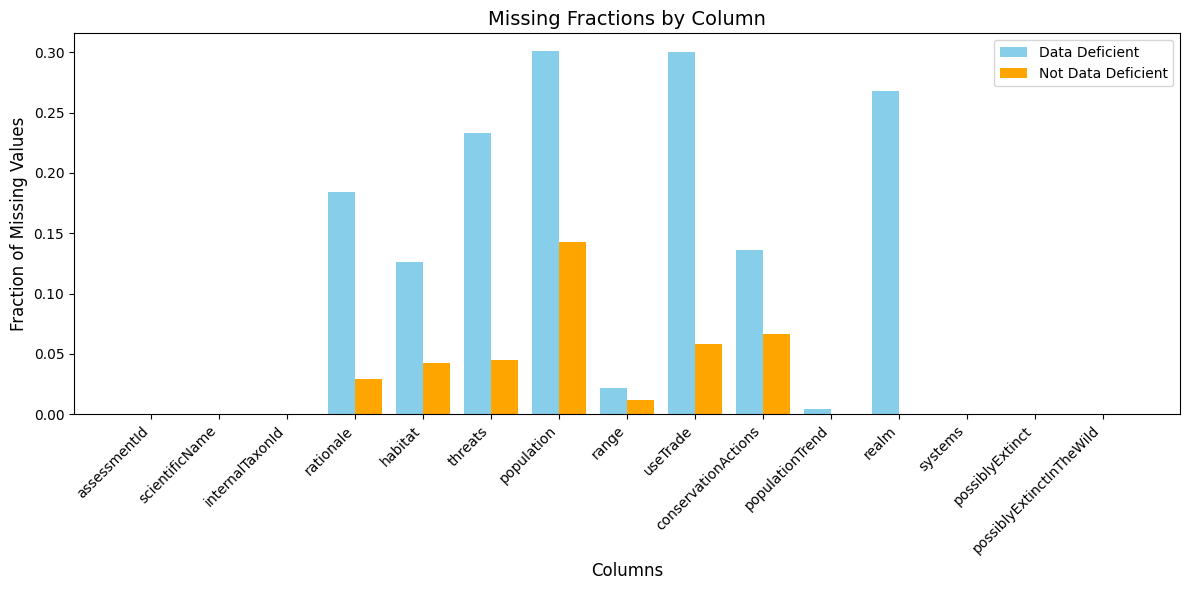

In [34]:
import matplotlib.pyplot as plt

# Extract data for plotting
columns = list(missing_fractions.keys())
data_deficient = [missing_fractions[col]['Data Deficient'] for col in columns]
not_data_deficient = [missing_fractions[col]['Not Data Deficient'] for col in columns]

# Plot the data
x = range(len(columns))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x, data_deficient, width, label='Data Deficient', color='skyblue')
plt.bar([i + width for i in x], not_data_deficient, width, label='Not Data Deficient', color='orange')

# Add labels, legend, and title
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Fraction of Missing Values', fontsize=12)
plt.title('Missing Fractions by Column', fontsize=14)
plt.xticks([i + width / 2 for i in x], columns, rotation=45, ha='right', fontsize=10)
plt.legend()
# plt.yscale('log')  # Set y-axis to logarithmic scale
plt.tight_layout()

# Show the plot
plt.show()

Clean textural columns

In [35]:

def clean_html(text):
    if pd.isnull(text):
        return ""
    return BeautifulSoup(text, "html.parser").get_text(separator=" ", strip=True).lower()

textual_cols = [
    'rationale', 'habitat', 'threats', 'population',
    'range', 'useTrade', 'conservationActions'
]

for col in textual_cols:
    df[col] = df[col].apply(clean_html)


/tmp/ipykernel_3975209/2891593171.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text(separator=" ", strip=True).lower()
/tmp/ipykernel_3975209/2891593171.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text(separator=" ", strip=True).lower()
/tmp/ipykernel_3975209/2891593171.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text(separator=" ", strip=True).lower()
/tmp/ipykernel_3975209/2891593171.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open thi

In [36]:
df['rationale'] = df['rationale'].str.replace('\xa0', ' ', regex=False)

In [38]:
strings_to_delete = set(['(lc)', '(nt)', '(vu)', '(en)', '(cr)', '(ex)'])

In [39]:
df['rationale'] = df['rationale'].replace(
    to_replace=r'|'.join(re.escape(s) for s in strings_to_delete),
    value='',
    regex=True
)

In [40]:
df['rationale'][0:10].to_list()

['the bluntnose sixgill shark ( hexanchus griseus ) is a large (to 550 cm total length) deep-water shark known with a global yet patchy distribution. it occurs in tropical, temperate and boreal waters off continental slopes and shelves, and occasionally inshore at depths of 0–2,490 m, but mostly at depths of 200–1,100 m. it has large litters but an estimated late age-at-maturity that reduces its capacity to recover from fishing pressure. the species is infrequently caught incidentally in deep-water industrial and artisanal  fisheries across its range. there is high distribution overlap with intensive fishing pressure, reported declines in part of its range and increases in others, and a lack of species-specific management across its entire range. the bluntnose sixgill shark is estimated to have undergone a population reduction of 20–29% over the past three generations (160 years) based on abundance data and actual levels of exploitation, and it is assessed as near threatened (close to 

In [42]:
unknown_values  = {}

Process structural features

In [43]:
categorical_cols = ['populationTrend', 'realm', 'systems'] #, 'redlistCriteria']
#  'possiblyExtinct', 'possiblyExtinctInTheWild'
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

Ordinal encoding for 'populationTrend'

In [44]:
populationTrend_map = {
    'Unknown': 0,
    'Decreasing': 1,
    'Stable': 2,
    'Increasing': 3
}
df['populationTrend'] = df['populationTrend'].map(populationTrend_map)

In [45]:
non_zero_population_trend = df['populationTrend'][df['populationTrend'] != 0]
median_population_trend = non_zero_population_trend.median()
mean_population_trend = non_zero_population_trend.mean()

print(f"Median of non-zero populationTrend: {median_population_trend}")
print(f"Mean of non-zero populationTrend: {mean_population_trend}")

Median of non-zero populationTrend: 2.0
Mean of non-zero populationTrend: 1.5563551401869158


In [46]:
df['populationTrend'] = df['populationTrend'].replace(0, mean_population_trend)

In [47]:
unknown_values['populationTrend'] = mean_population_trend

Multi-hot encoding for 'realm'

In [48]:
# Split by '|'
df['realm'] = df['realm'].apply(lambda x: x.split("|"))

# Get all unique realm values
all_realms = set(realm.strip() for sublist in df['realm'] for realm in sublist if realm)
print(f"Unique realms: {len(all_realms)}")

Unique realms: 9


In [50]:
all_realms

{'Afrotropical',
 'Antarctic',
 'Australasian',
 'Indomalayan',
 'Nearctic',
 'Neotropical',
 'Oceanian',
 'Palearctic',
 'Unknown'}

In [49]:
realm_to_index = {r: i for i, r in enumerate(all_realms)}
num_realms = len(all_realms)

# Step 3: Build 0/1 vector for each row
import numpy as np

def encode_realm_vector(realm_list):
    vec = np.zeros(num_realms, dtype=int)
    for r in realm_list:
        r = r.strip()
        if r in realm_to_index:
            vec[realm_to_index[r]] = 1
    return vec

df['realm_vector'] = df['realm'].apply(encode_realm_vector)

# Optional: drop original realm column
df.drop(columns=['realm'], inplace=True)

In [51]:
df['realm_vector'][0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0])

In [52]:
unknown_values['realm_vector'] = df['realm_vector'][0]

Multi hot encoding for 'systems'

In [53]:
# Step 1: Fill missing and split
df['systems'] = df['systems'].fillna("").apply(lambda x: x.split("|"))

# Step 2: Get unique system labels
unique_systems = sorted(set(s.strip() for sublist in df['systems'] for s in sublist if s))
system_to_index = {s: i for i, s in enumerate(unique_systems)}
num_systems = len(unique_systems)

# Step 3: Encode each row as 0/1 vector
def encode_system_vector(system_list):
    vec = np.zeros(num_systems, dtype=int)
    for s in system_list:
        s = s.strip()
        if s in system_to_index:
            vec[system_to_index[s]] = 1
    return vec

df['systems_vector'] = df['systems'].apply(encode_system_vector)


In [54]:
system_to_index

{'Freshwater (=Inland waters)': 0, 'Marine': 1, 'Terrestrial': 2}

In [55]:
unknown_values['systems_vector'] = np.zeros(3, dtype=int) #np.zeros(3, dtype=int)

In [56]:
# Optional: drop original column
df.drop(columns=['systems'], inplace=True)

Boolean encoding for 'possiblyExtinct' and 'possiblyExtinctInTheWild'

In [57]:
fraction_true_pe = df['possiblyExtinct'].dropna().mean()
print(f"Fraction of 'possiblyExtinct' that are True: {fraction_true_pe:.4f}")
fraction_true_pew = df['possiblyExtinctInTheWild'].dropna().mean()
print(f"Fraction of 'possiblyExtinctInTheWild' that are True: {fraction_true_pew:.4f}")

Fraction of 'possiblyExtinct' that are True: 0.0079
Fraction of 'possiblyExtinctInTheWild' that are True: 0.0002


In [58]:
# Boolean conversion
df['possiblyExtinct'] = df['possiblyExtinct'].fillna(fraction_true_pe).astype(float)
df['possiblyExtinctInTheWild'] = df['possiblyExtinctInTheWild'].fillna(fraction_true_pew).astype(float)

In [59]:
unknown_values['possiblyExtinct'] = fraction_true_pe
unknown_values['possiblyExtinctInTheWild'] = fraction_true_pew

Redlist category column

In [60]:
data_deficient_rows = df[df['redlistCategory'] == 'Data Deficient']
print(len(data_deficient_rows))

8181


In [61]:
print(df['redlistCategory'].unique())

['Near Threatened' 'Critically Endangered' 'Data Deficient' 'Vulnerable'
 'Least Concern' 'Endangered' 'Extinct' 'Extinct in the Wild'
 'Lower Risk/conservation dependent' 'Lower Risk/least concern'
 'Lower Risk/near threatened']


In [62]:
print(df['redlistCategory'].value_counts())

redlistCategory
Least Concern                        30075
Data Deficient                        8181
Endangered                            3941
Vulnerable                            3586
Near Threatened                       2312
Critically Endangered                 2259
Extinct                                244
Lower Risk/near threatened              19
Extinct in the Wild                     16
Lower Risk/least concern                 8
Lower Risk/conservation dependent        2
Name: count, dtype: int64


In [63]:
categories_to_drop = [
    'Lower Risk/near threatened', 
    'Extinct in the Wild', 
    'Lower Risk/least concern', 
    'Lower Risk/conservation dependent'
]

df = df[~df['redlistCategory'].isin(categories_to_drop)]

In [64]:
category_counts = df['redlistCategory'].value_counts()
print(category_counts)

redlistCategory
Least Concern            30075
Data Deficient            8181
Endangered                3941
Vulnerable                3586
Near Threatened           2312
Critically Endangered     2259
Extinct                    244
Name: count, dtype: int64


In [65]:
redlist_map = {
    'Data Deficient': 0,
    'Least Concern': 1,
    'Near Threatened': 2,
    'Vulnerable': 3,
    'Endangered': 4,
    'Critically Endangered': 5,
    'Extinct': 6
}
df['redlistCategory'] = df['redlistCategory'].map(redlist_map)

In [56]:
# merged_category_counts = df['redlistCategory'].value_counts()

# # Plot the results as a pie chart
# plt.figure(figsize=(8, 8))
# merged_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
# # plt.title('Red List Categories Distribution')
# plt.ylabel('')  # Remove y-axis label for better visualization
# plt.show()

Redact redlist category in 'rationale'

In [66]:
df['rationale'][0]

'the bluntnose sixgill shark ( hexanchus griseus ) is a large (to 550 cm total length) deep-water shark known with a global yet patchy distribution. it occurs in tropical, temperate and boreal waters off continental slopes and shelves, and occasionally inshore at depths of 0–2,490 m, but mostly at depths of 200–1,100 m. it has large litters but an estimated late age-at-maturity that reduces its capacity to recover from fishing pressure. the species is infrequently caught incidentally in deep-water industrial and artisanal  fisheries across its range. there is high distribution overlap with intensive fishing pressure, reported declines in part of its range and increases in others, and a lack of species-specific management across its entire range. the bluntnose sixgill shark is estimated to have undergone a population reduction of 20–29% over the past three generations (160 years) based on abundance data and actual levels of exploitation, and it is assessed as near threatened (close to m

In [67]:
import re

def redact_categories(text):
    if pd.isnull(text):
        return ""
    # Remove IUCN categories
    categories = [
        'least concern', 'near threatened', 'vulnerable',
        'endangered', 'critically endangered', 'extinct',
        'data deficient'
    ]
    pattern = r'(' + '|'.join(re.escape(cat) for cat in categories) + r')'
    text = re.sub(pattern, '[REDACTED]', text, flags=re.IGNORECASE)
    
    # Remove phrases like "assessed as [CATEGORY]"
    text = re.sub(r'assessed as .*?\.', '[REDACTED].', text, flags=re.IGNORECASE)
    return text

# Apply this to rationale and optionally other fields
df['rationale'] = df['rationale'].apply(redact_categories)


In [68]:
df['rationale'][0]

'the bluntnose sixgill shark ( hexanchus griseus ) is a large (to 550 cm total length) deep-water shark known with a global yet patchy distribution. it occurs in tropical, temperate and boreal waters off continental slopes and shelves, and occasionally inshore at depths of 0–2,490 m, but mostly at depths of 200–1,100 m. it has large litters but an estimated late age-at-maturity that reduces its capacity to recover from fishing pressure. the species is infrequently caught incidentally in deep-water industrial and artisanal  fisheries across its range. there is high distribution overlap with intensive fishing pressure, reported declines in part of its range and increases in others, and a lack of species-specific management across its entire range. the bluntnose sixgill shark is estimated to have undergone a population reduction of 20–29% over the past three generations (160 years) based on abundance data and actual levels of exploitation, and it is [REDACTED].'

Process the taxonomy feature

In [70]:
taxonomy_df = pd.read_csv('data/taxonomy.csv')

# You only need to do this once to create vocabularies
taxonomy_levels = ['className', 'orderName', 'familyName', 'genusName', 'speciesName']
taxonomy_vocab = {}

for level in taxonomy_levels:
    unique_vals = taxonomy_df[level].dropna().unique()
    taxonomy_vocab[level] = {val: idx for idx, val in enumerate(unique_vals)}


In [71]:
taxonomy_vocab

{'className': {'CHONDRICHTHYES': 0,
  'REPTILIA': 1,
  'ACTINOPTERYGII': 2,
  'MAMMALIA': 3,
  'AMPHIBIA': 4,
  'PETROMYZONTI': 5,
  'SARCOPTERYGII': 6,
  'MYXINI': 7},
 'orderName': {'HEXANCHIFORMES': 0,
  'TESTUDINES': 1,
  'CYPRINODONTIFORMES': 2,
  'SILURIFORMES': 3,
  'PERCIFORMES': 4,
  'SQUAMATA': 5,
  'TETRAODONTIFORMES': 6,
  'LAMNIFORMES': 7,
  'LAGOMORPHA': 8,
  'ANURA': 9,
  'ATHERINIFORMES': 10,
  'CAUDATA': 11,
  'CHIROPTERA': 12,
  'OSMERIFORMES': 13,
  'CYPRINIFORMES': 14,
  'SYNBRANCHIFORMES': 15,
  'GOBIIFORMES': 16,
  'CLUPEIFORMES': 17,
  'BELONIFORMES': 18,
  'RODENTIA': 19,
  'RAJIFORMES': 20,
  'RHINOPRISTIFORMES': 21,
  'CARCHARHINIFORMES': 22,
  'SQUALIFORMES': 23,
  'MYLIOBATIFORMES': 24,
  'GASTEROSTEIFORMES': 25,
  'PLEURONECTIFORMES': 26,
  'NOT ASSIGNED': 27,
  'ANGUILLIFORMES': 28,
  'MUGILIFORMES': 29,
  'CICHLIFORMES': 30,
  'CARNIVORA': 31,
  'PETROMYZONTIFORMES': 32,
  'OSTEOGLOSSIFORMES': 33,
  'SYNGNATHIFORMES': 34,
  'BATRACHOIDIFORMES': 35,
  'SCO

In [72]:
for level in taxonomy_vocab:
    print(level, len(taxonomy_vocab[level]))

className 8
orderName 101
familyName 878
genusName 7618
speciesName 28218


In [73]:
df = df.merge(taxonomy_df[['internalTaxonId'] + taxonomy_levels], on='internalTaxonId', how='left')

In [74]:
for level in taxonomy_levels:
    df[f'{level}_idx'] = df[level].map(taxonomy_vocab[level]).fillna(-1).astype(int)

In [75]:
output_file_path = 'data/df_processed.csv'  # Specify the desired output file path
df.to_csv(output_file_path, index=False)

In [82]:
df['tax_text'] = df.apply(
    lambda row: f"Class: {row['className']}, Order: {row['orderName']}, Family: {row['familyName']}, Genus: {row['genusName']}, species: {row['scientificName']}",
    axis=1
)

In [83]:
df

,assessmentId,scientificName,internalTaxonId,redlistCategory,rationale,habitat,threats,population,range,useTrade,...,orderName,familyName,genusName,speciesName,className_idx,orderName_idx,familyName_idx,genusName_idx,speciesName_idx,tax_text
0,495630,Hexanchus griseus,10030,2,the bluntnose sixgill shark ( hexanchus griseu...,the bluntnose sixgill shark is demersal in tro...,the bluntnose sixgill shark is infrequently re...,species-specific population trend data are ava...,"the bluntnose sixgill shark has a widespread, ...","the species is utilized for its meat, liver oi...",...,HEXANCHIFORMES,HEXANCHIDAE,Hexanchus,griseus,0,0,0,0,0,"Class: CHONDRICHTHYES, Order: HEXANCHIFORMES, ..."
1,495907,Heosemys annandalii,10041,5,heosemys annandalii is considered [REDACTED] d...,"heosemys annandalii inhabits lowlands, and is ...",the main threats to this species are harvest a...,"according to tana et al . (2000), the populati...",the range of heosemys annandalii includes camb...,the species is collected for local consumption...,...,TESTUDINES,GEOEMYDIDAE,Heosemys,annandalii,1,1,1,1,1,"Class: REPTILIA, Order: TESTUDINES, Family: GE..."
2,497499,Hubbsina turneri,132523146,5,the highland splitfin is now only known to be ...,this species lives in quiet waters with curren...,the species has a restricted range and it is t...,"the only remaining population, that of lago za...",the highland splitfin is a freshwater fish spe...,the highland splitfin is not a target species ...,...,CYPRINODONTIFORMES,GOODEIDAE,Hubbsina,turneri,2,2,2,2,2,"Class: ACTINOPTERYGII, Order: CYPRINODONTIFORM..."
3,498370,Ictalurus australis,10767,0,ictalurus australis occurs in eastern mexico f...,i. australis inhabits quiet and slow-flowing w...,the main threat faced by this species is overf...,numerical estimates of population sizes and po...,ictalurus australis is distributed in the blan...,i. australis is primarily harvested and highly...,...,SILURIFORMES,ICTALURIDAE,Ictalurus,australis,2,3,3,3,3,"Class: ACTINOPTERYGII, Order: SILURIFORMES, Fa..."
4,498476,Ictalurus mexicanus,10769,3,i. mexicanus is herein categorized as [REDACTE...,specifics details are unknown for this species...,the main threats to the species include habita...,"ictalurus mexicanus is a very rare species, wi...",ictalurus mexicanus is a species endemic of th...,this species is not utilised or traded.,...,SILURIFORMES,ICTALURIDAE,Ictalurus,mexicanus,2,3,3,3,4,"Class: ACTINOPTERYGII, Order: SILURIFORMES, Fa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,267283710,Deania calceus,41798,2,the birdbeak dogfish ( deania calceus ) is a m...,the birdbeak dogfish occurs on continental and...,the birdbeak dogfish has been taken as both ta...,population size and trends for this species ac...,"the birdbeak dogfish has a widespread, yet pat...",the species has historically been utilized for...,...,SQUALIFORMES,CENTROPHORIDAE,Deania,calceus,0,23,724,7608,28214,"Class: CHONDRICHTHYES, Order: SQUALIFORMES, Fa..."
50594,267298077,Deania quadrispinosa,161635,3,the longsnout dogfish ( deania quadrispinosa )...,the longsnout dogfish is demersal on from cont...,the longsnout dogfish has been taken as both t...,population size and trends for this species ac...,the longsnout dogfish is known from the southe...,the species has historically been utilized for...,...,SQUALIFORMES,CENTROPHORIDAE,Deania,quadrispinosa,0,23,724,7608,28215,"Class: CHONDRICHTHYES, Order: SQUALIFORMES, Fa..."
50595,267959643,Etmopterus granulosus,116856245,1,the southern lanternshark ( etmopterus granulo...,the southern lanternshark is found on upper co...,the southern lanternshark is taken incidentall...,population size and trends for this species ar...,the southern lanternshark has a widespread but...,this species is not known to be utilized and i...,...,SQUALIFORMES,ETMOPTERIDAE,Etmopterus,granulosus,0,23,57,89,2261,"Class: CHONDRICHTHYES, Order: SQUALIFORMES, Fa..."
50596,268070453,Cercopithecus

Combine all the textural features and all the structural features

In [84]:
def parse_vector_string(v):
    # Handles strings like "[1 0 0]" → array([1, 0, 0])
    return np.array([int(i) for i in v.strip('[]').split()], dtype=np.int32)

# Load CSV
# df = pd.read_csv("data/df_processed.csv")  # replace with actual path

# Parse vectors
# df['realm_vector'] = df['realm_vector'].apply(parse_vector_string)
# df['systems_vector'] = df['systems_vector'].apply(parse_vector_string)

# Combine structured features into one array
df['structured_vector'] = df.apply(
    lambda row: np.concatenate([
        np.array([row['populationTrend']]), 
        np.array([row['possiblyExtinct']]), 
        np.array([row['possiblyExtinctInTheWild']]), 
        row['realm_vector'], 
        row['systems_vector']
    ]),
    axis=1
)

text_cols = ['rationale', 'habitat', 'threats', 'population', 'range', 'useTrade', 'conservationActions']
df['text_input'] = df[text_cols].fillna("No information").agg(" [SEP] ".join, axis=1)

Split into Train, Val, Test sets and DD set

In [85]:
from sklearn.model_selection import train_test_split

# Step 1: Separate Data Deficient (label == 0) for future prediction
df_deficient = df[df['redlistCategory'] == 0].copy()
df_labeled = df[df['redlistCategory'] != 0].copy()

# Step 2: Stratified split into train (80%) and test (20%)
df_train, df_test = train_test_split(
    df_labeled,
    test_size=0.20,
    stratify=df_labeled['redlistCategory'],
    random_state=42
)

# Optional sanity check
for split_name, split_df in [('Train', df_train), ('Test', df_test)]:
    print(f"{split_name} size: {len(split_df)}")
    print(split_df['redlistCategory'].value_counts(normalize=True).sort_index())
    print()

Train size: 33933
redlistCategory
1    0.709044
2    0.054490
3    0.084549
4    0.092918
5    0.053252
6    0.005747
Name: proportion, dtype: float64

Test size: 8484
redlistCategory
1    0.708982
2    0.054573
3    0.084512
4    0.092881
5    0.053277
6    0.005776
Name: proportion, dtype: float64



In [86]:
# Filter rows where internalTaxonId is null or missing
unknown_taxonomy_rows = df[df['internalTaxonId'].isnull()]

# Display the rows
print(unknown_taxonomy_rows)

Empty DataFrame
Columns: [assessmentId, scientificName, internalTaxonId, redlistCategory, rationale, habitat, threats, population, range, useTrade, conservationActions, populationTrend, possiblyExtinct, possiblyExtinctInTheWild, realm_vector, systems_vector, className, orderName, familyName, genusName, speciesName, className_idx, orderName_idx, familyName_idx, genusName_idx, speciesName_idx, tax_text, structured_vector, text_input]
Index: []

[0 rows x 29 columns]


In [89]:
with open('data/data_splits.pkl', 'wb') as f:
    pkl.dump({
        'train': df_train,
        'test': df_test,
        'deficient': df_deficient
                }, f)
    pkl.dump(unknown_values, f)